Problem: Given an array of integers, find the median value

Median: for an odd-length array, return the value that would be in the middle if the array was sorted. For even-length, there are two such middle values, so return the average of the two.

A more general problem:

**Selection Problem:** Given an array of elements (that can be compared) and an index $k$, return the element that would be at index $k$ if the array were to be sorted.

For example, consider array $A = [3, 2, 8, 9, 15, 16, -10, 13, 0]$

*  For $k = 0$, selection would return -10
*  For $k = 1$, selection would return 0
*  For $k = 5$, selection would return 9
*  For $k = 8$, selection would return 16

**Algorithm 1:** Sort the array using MergeSort and return the value at index $k$

Runtime: $\Theta (n \log n)$ for all cases

We could use a different sorting algorithm, but the runtime and space complexity would be entirely based on the sorting algorithm chosen.

**Algorithm 2:** QuickSelect. Informally, we choose some value as the "pivot", and we separate all other values into two groups, based on whether they are smaller than or greater than the pivot. Based on the sizes of the groups and the value of $k$, we can identify whether the desired value is in the first group or the second group or is the pivot itself. If they are in one of the groups, we repeat the process for that group.

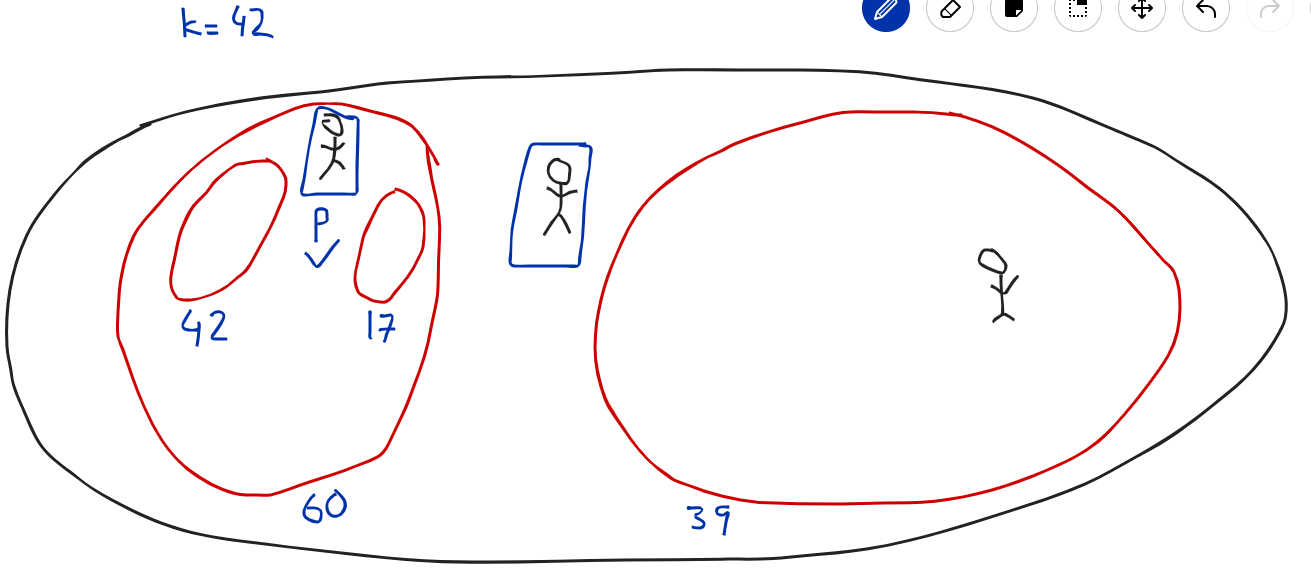

Several details need to be ironed out.

*   How do we choose the pivot element? For now, it doesn't matter, e.g, we can choose the last element of the array.
*   How do we separate the remaining elements into the two groups?

The second point is a separate problem by itself, which is the Partition problem.

Partition Solution 1: Make two arrays, one for elements smaller than the pivot and another for elements larger than the pivot. Go through the elements of the input array, compare with pivot, move to the respective new array. This would take $\Theta (n)$ time and $\Theta (n)$ space.

Can we achieve this with less space usage?

Partition Solution 2: Maintain two indices $i$ and $j$, where we scan the array with index $j$ while maintaining the following structure:

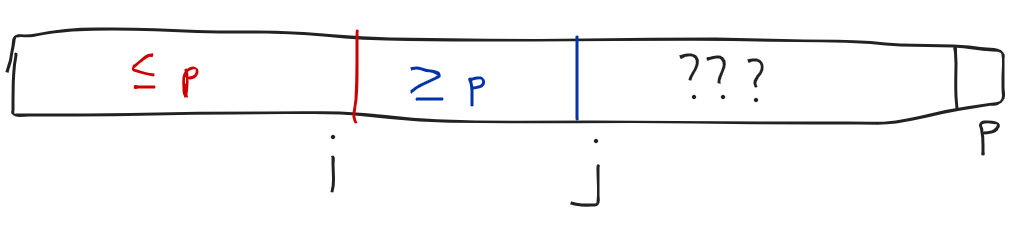



In [ ]:
# Pseudocode-only
def partition2 (lst, pidx, left = 0, right = len (lst) - 1):
  # move pivot to the end
  swap (lst[pidx], lst[right])
  pidx = right

  i = left - 1
  for j in range (left, right):
    if lst[j] <= lst[pidx]:   # lst[j] should go to the smaller group
      # swap lst[j] with first element of larger group
      swap (lst[j], lst[i + 1])
      i += 1
  # move pivot to the space after the smaller group
  swap (lst[pidx], lst[i + 1])
  return i + 1      # return the new index of the pivot


In [4]:
# Python-compatible
def partition2 (lst, pidx, left = 0, right = "DUMMY"):
  if right == "DUMMY":
    right = len (lst) - 1
  lst[pidx], lst[right] = lst[right], lst[pidx]
  pidx = right

  i = left - 1
  for j in range (left, right):
    if lst[j] <= lst[pidx]:
      lst[j], lst[i + 1] = lst[i + 1], lst[j]
      i += 1
  lst[pidx], lst[i + 1] = lst[i + 1], lst[pidx]
  return i + 1

lst = [3,2,8,9,15,16,-10,13,0]
print (lst)
print (partition2 (lst, 3))   # index 3, i.e., 9 is the pivot
print (lst)

[3, 2, 8, 9, 15, 16, -10, 13, 0]
5
[3, 2, 8, 0, -10, 9, 15, 13, 16]


Runtime for Partition: $\Theta (n)$ for all cases

In [ ]:
# Alternative implementation (pseudocode)
def partition3 (lst, pidx, left = 0, right = len (lst) - 1):
  # move pivot to the end
  swap (lst[pidx], lst[right])
  pidx = right

  i = left
  j = right - 1
  while True:
    while lst[i] < lst[pidx]:   # i keeps moving on for smaller values
      i += 1
    while lst[j] > lst[pidx]:   # j keeps moving on for larger values
      j -= 1
    if i >= j:      # if i crossed j, then we're done
      break
    swap (lst[i], lst[j])   # otherwise, swap lst[i] with lst[j]
    i += 1                  # and then let i and j move on
    j -= 1
  swap (lst[i], lst[pidx])
  return i

In [11]:
# Python-compatible
def partition3 (lst, pidx, left = 0, right = "DUMMY"):
  if right == "DUMMY":
    right = len (lst) - 1
  lst[pidx], lst[right] = lst[right], lst[pidx]
  pidx = right

  i = left
  j = right - 1
  while True:
    while lst[i] < lst[pidx]:
      i += 1
    while lst[j] > lst[pidx]:
      j -= 1
    if i >= j:
      break
    lst[i], lst[j] = lst[j], lst[i]
    i += 1
    j -= 1
  lst[i], lst[pidx] = lst[pidx], lst[i]
  return i

lst = [3,2,8,9,15,16,-10,13,0]
print (lst)
print (partition3 (lst, 3))   # index 3, i.e., 9 is the pivot
print (lst)


[3, 2, 8, 9, 15, 16, -10, 13, 0]
5
[3, 2, 8, 0, -10, 9, 15, 13, 16]


In [ ]:
# QuickSelect (A, k) returns the element of A at sorted index k, i.e.,
# the element that would be at index k if A were sorted
# k must be a valid index (from 0 to len (A) - 1)
def quickSelect2 (lst, k, left = 0, right = len (lst) - 1):
  pidx = left     # choose the first element as the pivot
  p = partition2 (lst, pidx, left, right)

  # Compare k with p to figure out where the target element is
  if k == p:      # if equal, then the pivot has sorted index k
    return lst[p]
  elif k < p:     # check the left subarray
    return quickSelect2 (lst, k, left, p - 1)
  else:   # k > p, check the right subarray
    return quickSelect2 (lst, k, p + 1, right)

In [13]:
def quickSelect2 (lst, k, left = 0, right = "DUMMY"):
  if right == "DUMMY":
    right = len (lst) - 1
  pidx = left
  p = partition2 (lst, pidx, left, right)

  if k == p:
    return lst[p]
  elif k < p:
    return quickSelect2 (lst, k, left, p - 1)
  else:
    return quickSelect2 (lst, k, p + 1, right)

lst = [3,2,8,9,15,16,-10,13,0]

print (quickSelect2 (lst, 0))   # -10
print (quickSelect2 (lst, 1))   # 0
print (quickSelect2 (lst, 5))   # 9
print (quickSelect2 (lst, 8))   # 16

-10
0
9
16


Runtime Analysis of QuickSelect

Best-Case Runtime: $\Theta (n)$, where our first pivot choice happens to be the target. We still need to perform partition once to find out its sorted index.

Worst-Case Runtime: $\Theta (n^2)$ if every partition has one side with $n - 1$ elements, and we always perform recursion on this larger side, until there is only one element left. More precise runtime calculation would be $n + (n - 1) + (n - 2) + \cdots + 2 + 1 \in \Theta (n^2)$.

Average-Case Runtime: We can express this by the following recurrence relation:

$T(n) = \underbrace{\Theta (n)}_{partition} + T (partition\_size)$

Let's try to find an upper bound for $T(n)$ using an upper bound for the average partition size.

(Average-Case, continued)

The sorted index of the pivot could be any index of the array. We can imagine the array as being split into four groups as follows:

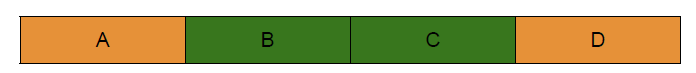

For the average-case, there is an equal number of inputs where the pivot's sorted index falls into a specific group, for each of A, B, C, and D, i.e., pivot index being at A consists of one-fourth of all inputs, pivot index being at B also consists of one-fourth of all inputs, and so on.

If the pivot index is at A or D, then we can say the parition size for recursion is $\leq n$.

If the pivot index is at B or C, then we can say the parition size for recursion is $\leq \frac{3n}{4}$.

Therefore, we can update the recurrence relation as:

$T(n) \leq \underbrace{\Theta (n)}_{partition} + \underbrace{\frac{1}{2} T(n)}_{AD} + \underbrace{\frac{1}{2} T\left(\frac{3n}{4}\right)}_{BC}$

$\implies T(n) - \frac{1}{2} T(n) \leq \Theta (n) + \frac{1}{2} T\left(\frac{3n}{4}\right)$

$\implies \frac{1}{2} T(n) \leq \Theta (n) + \frac{1}{2} T\left(\frac{3n}{4}\right)$

$\implies T(n) \leq \Theta (n) + T\left(\frac{3n}{4}\right)$

Using Master's Theorem, we have the average-case runtime in $O(n)$

This is actually better than our first approach of using MergeSort and then returning index $k$

Also, it uses $O(1)$ space with tail call elimination.